# Ames Housing Data

The main purpose of this data science project is to predict the home prices in Ames, Iowa by using regression models. By doing this data analysis, we can find the theoretical relationship have in mind. Probably, there is specific interest in the magnitudes and signs of the coefficients. Throughout the iterative modeling and feature selection processes manually and automatedly, we can gain a deeper insight into 80 variables which were directly related to property sales and understand better the mechanism behind various models.

In order to understand the dataset easier, please review the data description by the following link http://jse.amstat.org/v19n3/decock/DataDocumentation.txt


## Data Cleaning and EDA

In [1]:
import pandas as pd

import numpy as np

from scipy import stats

import matplotlib.pyplot as plt

import seaborn as sns

import sklearn

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler, LabelBinarizer



import pickle

import csv

import time

import re

from sklearn_pandas import DataFrameMapper

from sklearn_pandas import gen_features

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Loading the data

train = pd.read_csv('datasets/train.csv', na_values = "", keep_default_na = False)

test = pd.read_csv('datasets/test.csv', na_values = "", keep_default_na = False)

In [3]:
train.shape

(2197, 82)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2197 non-null   int64  
 1   PID              2197 non-null   int64  
 2   MS SubClass      2197 non-null   int64  
 3   MS Zoning        2197 non-null   object 
 4   Lot Frontage     1835 non-null   float64
 5   Lot Area         2197 non-null   int64  
 6   Street           2197 non-null   object 
 7   Alley            143 non-null    object 
 8   Lot Shape        2197 non-null   object 
 9   Land Contour     2197 non-null   object 
 10  Utilities        2197 non-null   object 
 11  Lot Config       2197 non-null   object 
 12  Land Slope       2197 non-null   object 
 13  Neighborhood     2197 non-null   object 
 14  Condition 1      2197 non-null   object 
 15  Condition 2      2197 non-null   object 
 16  Bldg Type        2197 non-null   object 
 17  House Style   

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2197.0,1.460513e+03,8.465373e+02,1.0,7.330000e+02,1452.0,2.196000e+03,2.929000e+03
PID,2197.0,7.127872e+08,1.887751e+08,526301100.0,5.284410e+08,535453150.0,9.071811e+08,1.007100e+09
MS SubClass,2197.0,5.706418e+01,4.236069e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,1835.0,6.954932e+01,2.318822e+01,21.0,5.850000e+01,69.0,8.000000e+01,3.130000e+02
Lot Area,2197.0,1.026807e+04,7.975741e+03,1300.0,7.500000e+03,9488.0,1.166000e+04,2.152450e+05
Overall Qual,2197.0,6.116523e+00,1.429613e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2197.0,5.552572e+00,1.107019e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2197.0,1.972031e+03,3.045007e+01,1872.0,1.954000e+03,1975.0,2.002000e+03,2.010000e+03
Year Remod/Add,2197.0,1.984781e+03,2.089825e+01,1950.0,1.966000e+03,1994.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2175.0,1.051016e+02,1.848972e+02,0.0,0.000000e+00,0.0,1.660000e+02,1.600000e+03


### Missing Values

Text(0, 0.5, 'Feature Names')

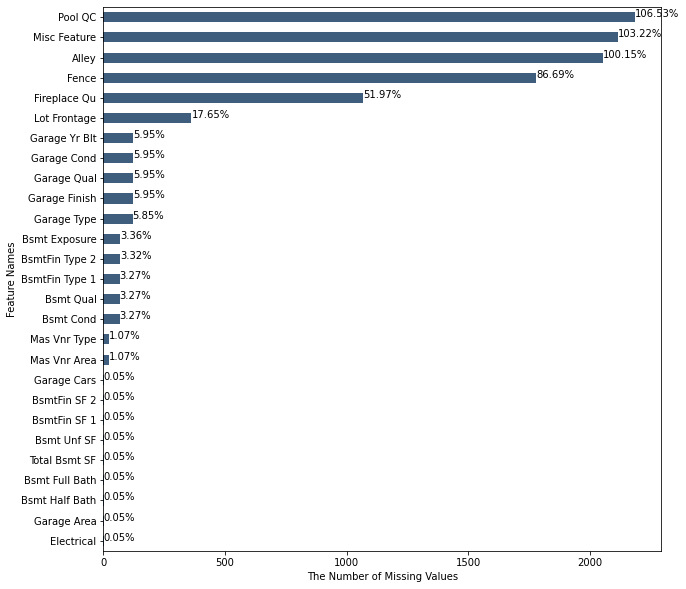

In [6]:
# Nan is the list of features, have null values

Nan = train.isnull().sum()[train.isnull().sum()>0]

Nan.sort_values().plot(kind='barh', figsize=(10, 10), color = "#3F5D7D");

for y, x in enumerate(Nan.sort_values()):
    
    plt.annotate(str(round(x/2051*100,2))+'%', xy=(x, y), size=10)
    
plt.xlabel('The Number of Missing Values')

plt.ylabel('Feature Names')

#### Relationship between Lot Frontage and Lot Area

Text(0.5, 1.0, 'Lot_Area vs Lot Frontage')

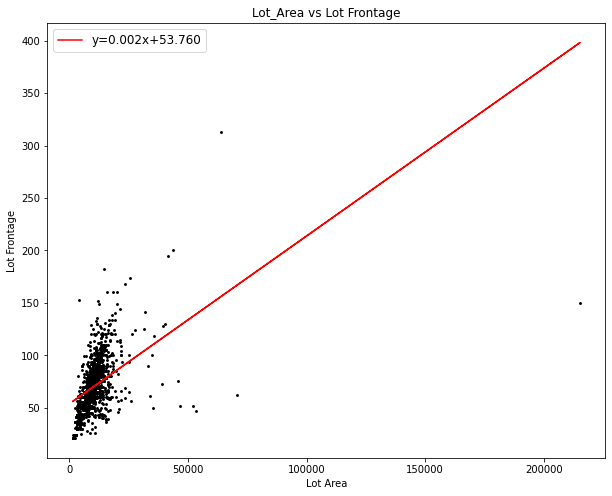

In [7]:
mask = train['Lot Frontage'].isnull() == False

Lot_x = train[mask]['Lot Area']

Lot_y = train[mask]['Lot Frontage']

slope, intercept, r_value, p_value, std_err = stats.linregress(Lot_x,Lot_y) # reference: stats model libraray

line = slope*Lot_x+intercept

plt.figure(figsize=(10,8))

plt.plot(Lot_x, line, 'r', label='y={:.3f}x+{:.3f}'.format(slope,intercept));

plt.scatter(Lot_x,Lot_y, color="k", s=3.5)

plt.legend(fontsize = 12)

plt.xlabel('Lot Area')

plt.ylabel('Lot Frontage')

plt.title('Lot_Area vs Lot Frontage')

Based on the graph above, we can see that Lot Frontage and Lot Area relatively have a linear relationship

In [8]:
train['Lot Frontage'] = train.apply(lambda row: round(row['Lot Area']*0.003 +43.332,1)
                                     if np.isnan(row['Lot Frontage']) else row['Lot Frontage'],axis =1)

#### Fill the 'Garage Yr Blt' null values with the same value as 'Year Built' of the house.

In [9]:
train['Garage Yr Blt'] = train.apply(lambda row: row['Year Built'] 
                                     if np.isnan(row['Garage Yr Blt']) else row['Garage Yr Blt'],axis =1)

#### Based on the data description, there are several columns that containing NA which are not the actual missing values but the 'None' of these features. Numerical features containing an NA will be set to 0, categorical features containing an NA will be set to string value 'None'.

In [10]:
# Checking columns contain missing values

train.isnull().sum()[train.isnull().sum()>0]

Alley             2054
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           67
Bsmt Cond           67
Bsmt Exposure       69
BsmtFin Type 1      67
BsmtFin SF 1         1
BsmtFin Type 2      68
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       1
Bsmt Half Bath       1
Fireplace Qu      1066
Garage Type        120
Garage Finish      122
Garage Cars          1
Garage Area          1
Garage Qual        122
Garage Cond        122
Pool QC           2185
Fence             1778
Misc Feature      2117
dtype: int64

In [11]:
train.fillna(train[['Garage Finish','Garage Qual','Garage Cond',
                    'Bsmt Cond', 'Bsmt Qual', 'Bsmt Exposure', 
                    'BsmtFin Type 1', 'BsmtFin Type 2','Mas Vnr Type']].fillna('None'),inplace=True)

train.fillna(train[['Bsmt Half Bath','Bsmt Full Bath','BsmtFin SF 1','BsmtFin SF 2',
                    'Bsmt Unf SF','Total Bsmt SF','Mas Vnr Area','Garage Cars',
                    'Garage Area']].fillna(0),inplace=True)

In [12]:
# Double check missing values

train.isnull().sum().sum()

9321

## Exploratory Data Analysis and Cleaning

#### Let's look at the distribution of the target variable SalePrice and Ground Living Area vs SalePrice

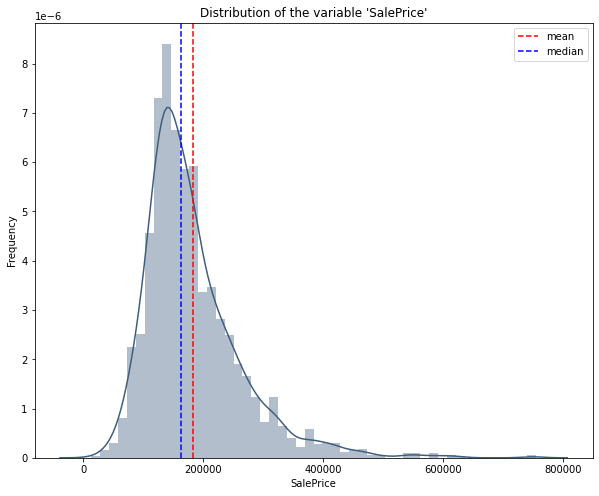

In [13]:
plt.figure(figsize=(10,8))

sns.distplot(train['SalePrice'], color="#3F5D7D")

plt.ylabel('Frequency')

plt.title("Distribution of the variable 'SalePrice'")

plt.axvline(train['SalePrice'].mean(), linestyle = '--', color = 'r', label ='mean')

plt.axvline(train['SalePrice'].median(), linestyle = '--', color = 'b', label ='median')

plt.legend()

The distribution of the SalePrice is right-skewed, the outliers can be observed in the data. Drop the rows that SalePrice lower than \$20000 and higher than \\$600000.

In [14]:
train[(train['SalePrice'] < 20000)|(train['SalePrice'] > 600000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
30,1768,528351010,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
177,1761,528320050,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
934,45,528150070,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
989,1554,910251050,20,A (agr),80.0,14584,Pave,NaN,Reg,Low,...,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,13100
1714,1064,528164060,20,RL,106.0,12720,Pave,NaN,Reg,HLS,...,144,Ex,NaN,NaN,0,2,2008,WD,Normal,615000
1852,2446,528320060,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000


In [15]:
train.drop([1554,182,45],0,inplace=True)

In [16]:
# selling price in log

train['SalePrice'] = np.log(train['SalePrice'])

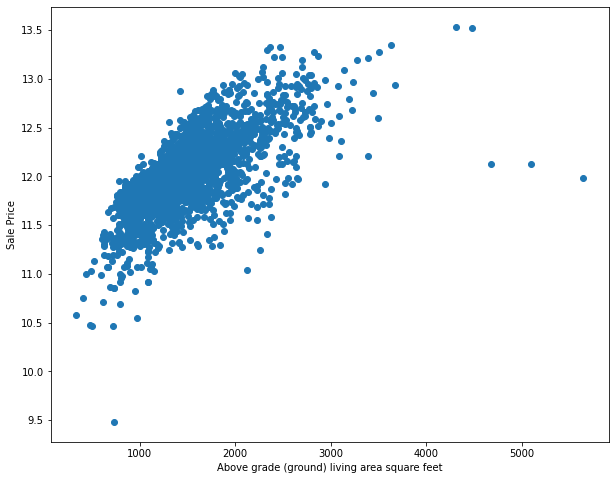

In [17]:
plt.figure(figsize=(10,8))

plt.scatter(x = train['Gr Liv Area'], y = train['SalePrice'])

plt.xlabel('Above grade (ground) living area square feet')

plt.ylabel('Sale Price')

plt.show()

In [18]:
# So, we need to drop some observations which have more than 4000 sq_ft living area.

train.drop(train[train['Gr Liv Area'] > 4000].index, inplace = True)

train.drop(train[train['SalePrice'] < 10].index, inplace = True)

**Now, we will do the same thing with test dataset.**

In [19]:
test.head(3)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,2127,907135180,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1,193,903206120,75,RL,NaN,7793,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
2,2407,528181040,120,RL,40.0,6792,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2006,New,Partial


In [20]:
test.shape

(733, 81)

In [21]:
# Checking missing values for each column

test.isnull().sum()[test.isnull().sum()>0]

Lot Frontage      128
Alley             678
Mas Vnr Type        1
Mas Vnr Area        1
Bsmt Qual          13
Bsmt Cond          13
Bsmt Exposure      14
BsmtFin Type 1     13
BsmtFin Type 2     13
Bsmt Full Bath      1
Bsmt Half Bath      1
Fireplace Qu      356
Garage Type        37
Garage Yr Blt      37
Garage Finish      37
Garage Qual        37
Garage Cond        37
Pool QC           732
Fence             580
Misc Feature      707
dtype: int64

Text(0.5, 1.0, 'Lot_Area vs Lot Frontage')

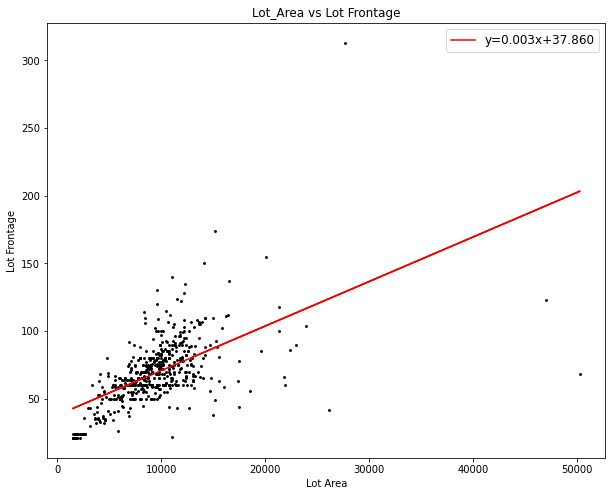

In [22]:
mask_test = test['Lot Frontage'].isnull() == False

Lot_x_test = test[mask_test]['Lot Area']

Lot_y_test = test[mask_test]['Lot Frontage']

slope, intercept, r_value, p_value, std_err = stats.linregress(Lot_x_test,Lot_y_test) # reference: stats model libraray

line = slope*Lot_x_test+intercept

plt.figure(figsize=(10,8))

plt.plot(Lot_x_test, line, 'r', label='y={:.3f}x+{:.3f}'.format(slope,intercept));

plt.scatter(Lot_x_test,Lot_y_test, color="k", s=3.5)

plt.legend(fontsize = 12)

plt.xlabel('Lot Area')

plt.ylabel('Lot Frontage')

plt.title('Lot_Area vs Lot Frontage')

In [23]:
test['Lot Frontage'] = test.apply(lambda row: round(row['Lot Area']*0.001 +58.445,1)
                                     if np.isnan(row['Lot Frontage']) else row['Lot Frontage'],axis =1)

In [24]:
# Checking missing values for each column again

test.isnull().sum()[test.isnull().sum()>0]

Alley             678
Mas Vnr Type        1
Mas Vnr Area        1
Bsmt Qual          13
Bsmt Cond          13
Bsmt Exposure      14
BsmtFin Type 1     13
BsmtFin Type 2     13
Bsmt Full Bath      1
Bsmt Half Bath      1
Fireplace Qu      356
Garage Type        37
Garage Yr Blt      37
Garage Finish      37
Garage Qual        37
Garage Cond        37
Pool QC           732
Fence             580
Misc Feature      707
dtype: int64

#### Fill the 'Garage Yr Blt' null values with the same value as 'Year Built' of the house

In [25]:
test['Garage Yr Blt'] = test.apply(lambda row: row['Year Built'] 
                                     if np.isnan(row['Garage Yr Blt']) else row['Garage Yr Blt'],axis =1)

In [26]:
test.fillna(train[['Mas Vnr Type', 'Electrical', 'Garage Finish']].fillna('None'),inplace=True)

test.fillna(train[['Mas Vnr Area']].fillna(0),inplace=True)

In [27]:
# Checking missing values again

test.isnull().sum().sum()

3232

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2188 entries, 0 to 2196
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2188 non-null   int64  
 1   PID              2188 non-null   int64  
 2   MS SubClass      2188 non-null   int64  
 3   MS Zoning        2188 non-null   object 
 4   Lot Frontage     2188 non-null   float64
 5   Lot Area         2188 non-null   int64  
 6   Street           2188 non-null   object 
 7   Alley            143 non-null    object 
 8   Lot Shape        2188 non-null   object 
 9   Land Contour     2188 non-null   object 
 10  Utilities        2188 non-null   object 
 11  Lot Config       2188 non-null   object 
 12  Land Slope       2188 non-null   object 
 13  Neighborhood     2188 non-null   object 
 14  Condition 1      2188 non-null   object 
 15  Condition 2      2188 non-null   object 
 16  Bldg Type        2188 non-null   object 
 17  House Style   

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            733 non-null    int64  
 1   PID              733 non-null    int64  
 2   MS SubClass      733 non-null    int64  
 3   MS Zoning        733 non-null    object 
 4   Lot Frontage     733 non-null    float64
 5   Lot Area         733 non-null    int64  
 6   Street           733 non-null    object 
 7   Alley            55 non-null     object 
 8   Lot Shape        733 non-null    object 
 9   Land Contour     733 non-null    object 
 10  Utilities        733 non-null    object 
 11  Lot Config       733 non-null    object 
 12  Land Slope       733 non-null    object 
 13  Neighborhood     733 non-null    object 
 14  Condition 1      733 non-null    object 
 15  Condition 2      733 non-null    object 
 16  Bldg Type        733 non-null    object 
 17  House Style     

# Exploratory Visualizations and Pre-processing


### Exploratory Visualizations
   - Look at correlations.
   - Look at relationships to target (scatter plots for continuous, box plots for categorical).

### Pre-processing
   - One-hot encode categorical variables.
   - Train/test split your data.
   - Scale your data.
   - Consider using automated feature selection.

### Categorical features vs SalePrice

In [30]:
# Creating a function to plot boxplot

def subplot_boxplot(dataframe, list_of_columns):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) 
    
    ax = ax.ravel() 
    
    if len(list_of_columns) %2 !=0:
        
        ax[len(list_of_columns)].set_visible(False)
        
    for i, column in enumerate(list_of_columns):
        
        names = train.groupby(column).mean()['SalePrice'].sort_values().index
        
        sns.boxplot(dataframe[column],dataframe['SalePrice'],order = names, ax = ax[i], color="#3F5D7D") 
        
        ax[i].set_title(f' " SalePrice" vs "{column}"', fontsize =18)
        
        ax[i].set_ylabel('Values',fontsize=15)
        
        ax[i].set_xlabel(column,fontsize=15) 
        
        ax[i].set_xticklabels(names,rotation=40) 
        
    plt.tight_layout()

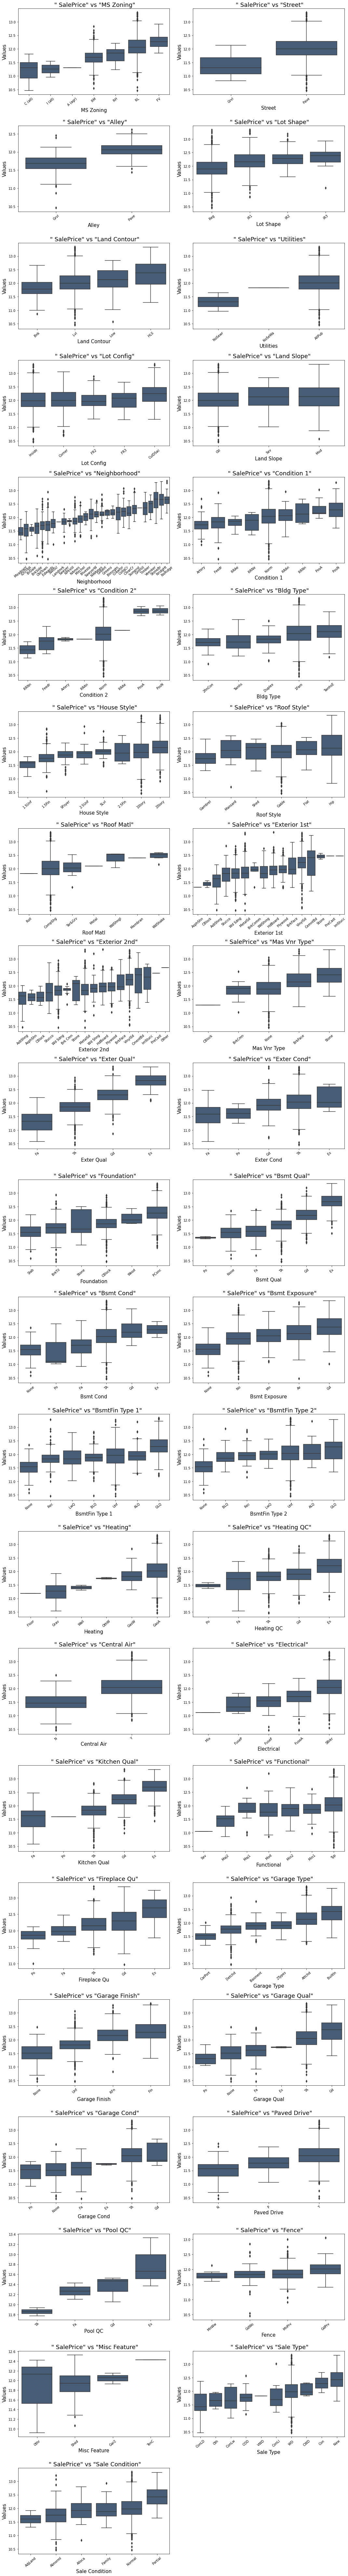

In [31]:
Catogories_columns = train.select_dtypes(include = 'object').columns

subplot_boxplot(train, Catogories_columns)

By observation on the boxplots of categorical features, the Lot Config, and Land Slope don't have linear relationships with SalePrice. Moreover, the features of Lot Config, Land Slope and Utilities can be dropped from the training dataset.

In [32]:
train.drop(['Lot Config','Land Slope','Utilities','Alley','Electrical'], axis =1, inplace=True)

## Numerical features vs SalePrice

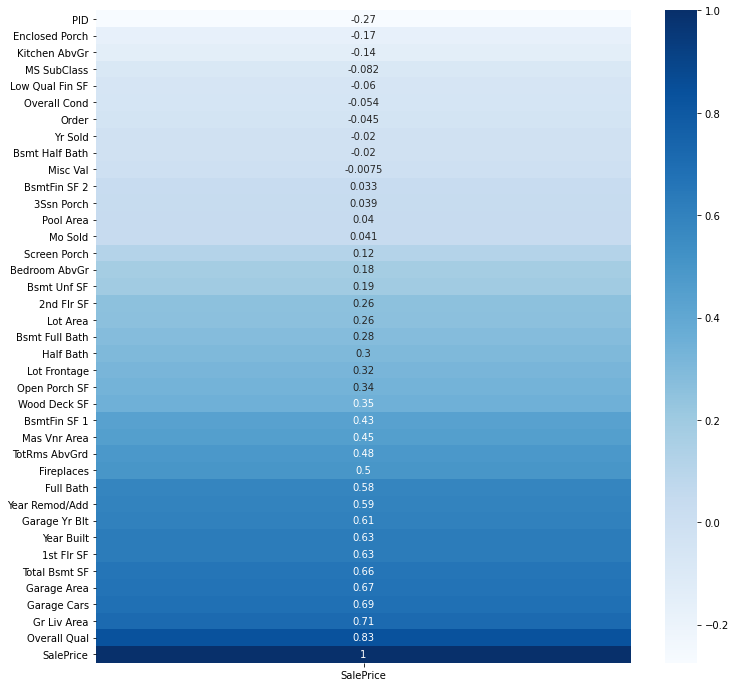

In [33]:
plt.figure(figsize = (12,12))

sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice'), annot=True,cmap ='Blues');

In [34]:
# Drop the irrelated data columns 

# Drop the irrelated data columns 

train.drop(['PID','Misc Val','Fireplaces','Fireplace Qu','Garage Type','Pool QC','Fence','Misc Feature'],axis =1, inplace=True)

#### Relationship between Total Bsmt SF and BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF

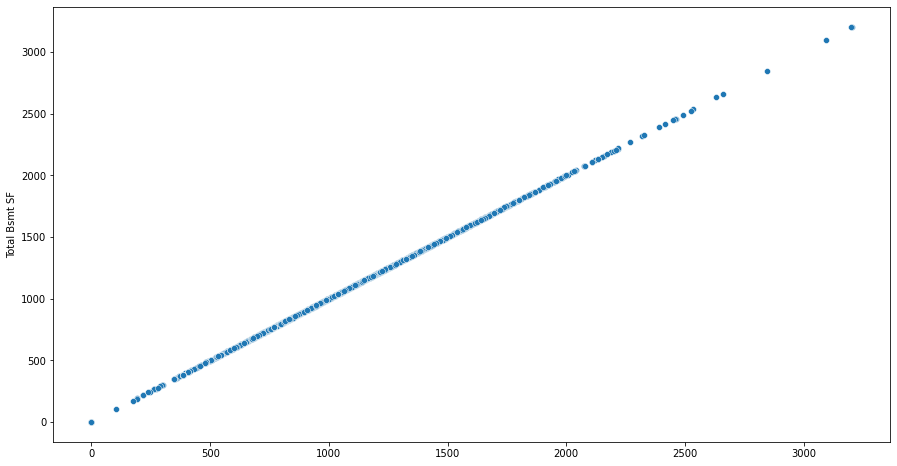

In [35]:
plt.figure(figsize=(15,8))

sns.scatterplot(train['BsmtFin SF 1']+train['BsmtFin SF 2']+train['Bsmt Unf SF'],train['Total Bsmt SF']);

Basd on observating, we can see that Total Bsmt SF = BsmtFin SF 1+ BsmtFin SF 2+ Bsmt Unf SF, so I keep only Total Bsmt SF feature

In [36]:
train.drop(['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF'], 1, inplace=True)

#### Relationship between Gr Liv Area and 1st Flr SF, 2nd  Flr SF, Low Qual Fin SF

<AxesSubplot:ylabel='Gr Liv Area'>

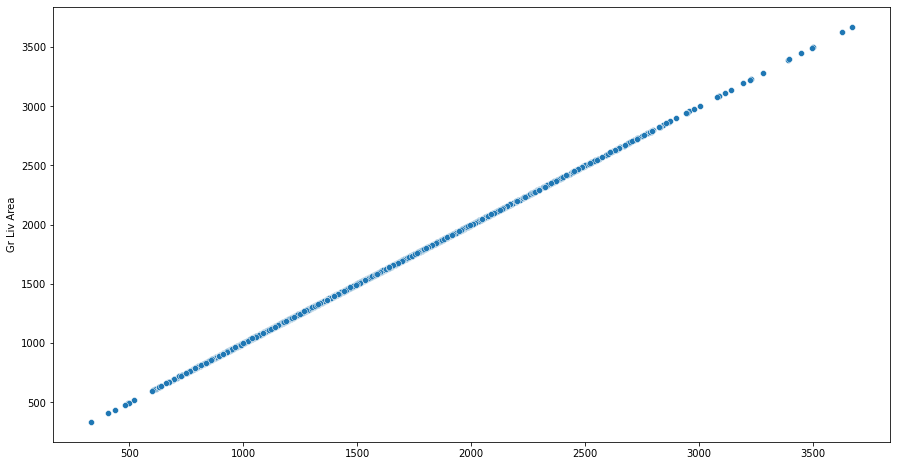

In [37]:
plt.figure(figsize=(15,8))

sns.scatterplot(train['1st Flr SF']+train['2nd Flr SF']+train['Low Qual Fin SF'],train['Gr Liv Area'])

In [38]:
# Again, I only keep "Gr Liv Area" feature

train.drop(['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF'], 1, inplace=True)

The scatter plot can be useful for looking at the linear relationship between the target variable and the variables which have the correlation coefficient higher than 0.25

In [39]:
def subplot_scatter(dataframe, x):
    
    nrows = int(np.ceil(len(x)/2)) # Makes sure we have enough row
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) # to specify your figsize
    
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    if len(x) %2 !=0:
        
        ax[len(x)].set_visible(False)
        
    for i in range(len(x)): # Gives us an index value to get into all our lists
        
        sns.scatterplot(dataframe[x[i]],dataframe['SalePrice'] ,ax = ax[i],color="#3F5D7D") 
        
        ax[i].set_title(x[i] +' vs SalePrice', fontsize =18)
        
        ax[i].set_ylabel('SalePrice',fontsize=15)
        
        ax[i].set_xlabel(x[i],fontsize=15)
        
        ax[i].spines["top"].set_visible(False)  
        
        ax[i].spines["right"].set_visible(False) 
        
    plt.tight_layout()

In [40]:
high_corr = (abs(train.corr()[['SalePrice']])>0.25)['SalePrice']

corr_features = train.corr()[['SalePrice']][high_corr][:-1].index

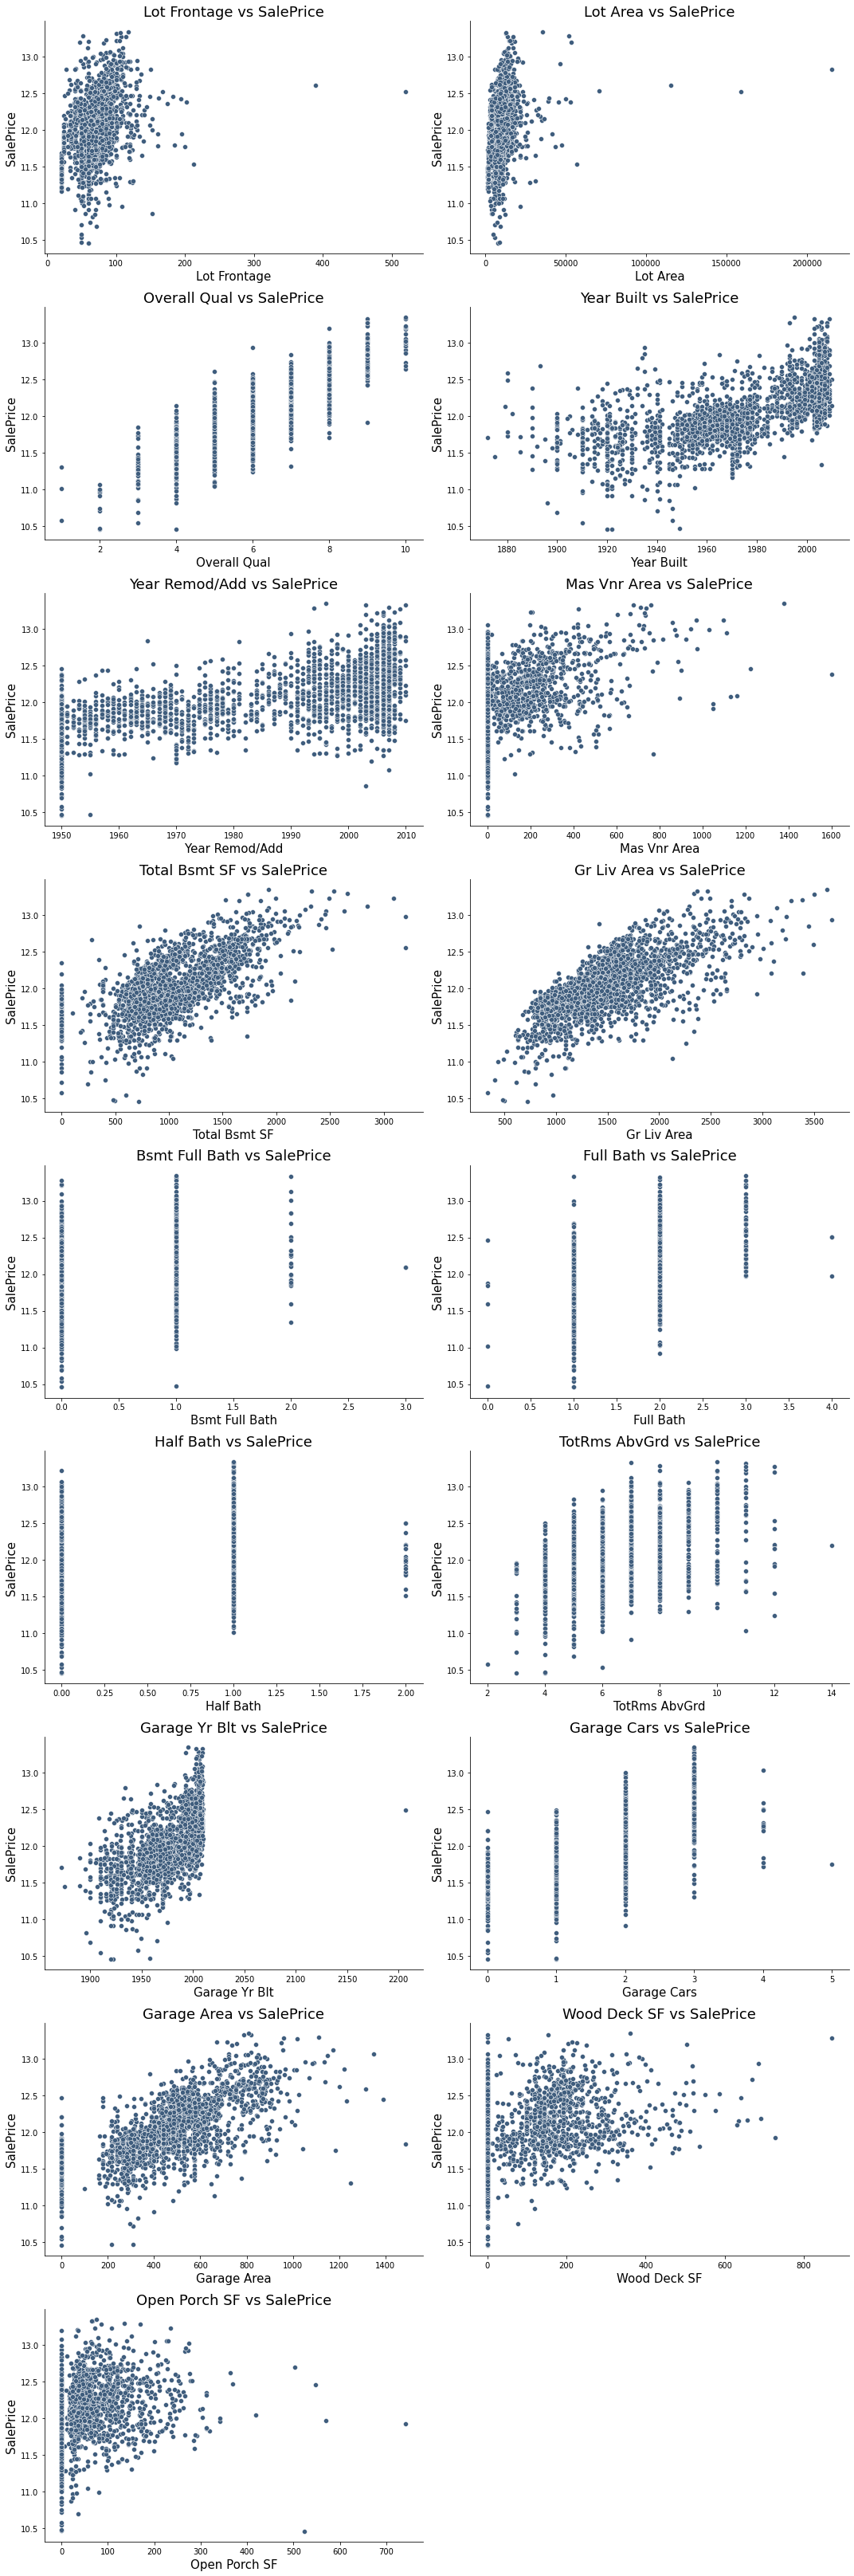

In [41]:
subplot_scatter(train,corr_features)

#### Filter the training dataset in order to include only categorical variables and numerical variables which have high linear relationship with target variable SalePrice.

In [42]:
Category = train.select_dtypes(include = 'object').columns

high_corr = (abs(train.corr()[['SalePrice']])>0.25)['SalePrice']

corr_gt_25 = train.corr()[['SalePrice']][high_corr].index

In [43]:
train_clean = pd.concat([train[Category],train[corr_gt_25]],axis=1)

In [44]:
train_clean.head()

,MS Zoning,Street,Lot Shape,Land Contour,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,...,Bsmt Full Bath,Full Bath,Half Bath,TotRms AbvGrd,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,SalePrice
0,RL,Pave,Reg,Lvl,SawyerW,Norm,Norm,1Fam,1Story,Gable,...,0.0,1,1,6,2007.0,2.0,576.0,0,178,11.976659
1,RL,Pave,IR1,Lvl,SawyerW,Norm,Norm,1Fam,1Story,Hip,...,0.0,2,0,7,1990.0,3.0,701.0,84,70,12.513190
2,RL,Pave,IR1,Lvl,Timber,Norm,Norm,1Fam,SLvl,Gable,...,0.0,1,0,7,1958.0,2.0,525.0,0,118,11.831379
3,RL,Pave,Reg,Lvl,NridgHt,Norm,Norm,TwnhsE,1Story,Hip,...,0.0,2,0,6,2008.0,2.0,539.0,192,42,12.423198
4,RL,Pave,IR1,Lvl,Gilbert,RRAn,Norm,1Fam,SLvl,Gable,...,0.0,2,1,7,2004.0,2.0,400.0,0,0,12.025749


In [45]:
train_clean.shape

(2188, 51)

In [46]:
# Separating "Numeric" and "Catogories" types

train_clean_numeric = train.select_dtypes(include = [np.number])

train_clean_object = train_clean.select_dtypes(include = 'object')

In [47]:
# One-hot-encode

feature_def = gen_features(columns = train_clean_object.columns.tolist(), classes=[LabelBinarizer])

mapper5 = DataFrameMapper(feature_def,df_out=True)

object_df = mapper5.fit_transform(train_clean_object)

In [48]:
# New dataframe for pre-processing

house = pd.concat([train_clean_numeric, object_df], axis=1)

In [82]:
house.shape

(2188, 260)

In [83]:
## dummied category only in train data
for col in set(house.columns) - set(test.columns):
    test[col] = 0
## dummied category only in test data
for col in set(test.columns) - set(house.columns):
    test.drop(col, axis=1, inplace=True)

## Declare the X and the y

In [84]:
y = house['SalePrice']

X = house.drop(['SalePrice'],axis=1).values

## Scale the data

In [85]:
# Create a scaler object

scaler = StandardScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)

## Train Test Split

In [86]:
# Split the variables with an 80-20 split and some random state. In order to have the same split as mine, use random_state = 365

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 365)

In [123]:
house.head()

,Order,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,534,20,80.0,9605,7,6,2007,2007,0.0,1218.0,...,0,0,0,1,0,0,0,0,1,0
1,803,20,90.0,14684,7,7,1990,1991,234.0,2158.0,...,0,0,0,1,0,0,0,0,1,0
2,956,20,86.5,14375,6,6,1958,1958,541.0,819.0,...,0,0,0,0,1,0,0,0,0,0
3,460,120,48.0,6472,9,5,2008,2008,500.0,1451.0,...,0,0,0,1,0,0,0,0,1,0
4,487,80,61.0,9734,7,5,2004,2004,0.0,384.0,...,0,0,0,1,0,0,0,0,1,0


### Declare the X and the y

In [87]:
y = house['SalePrice']

X = house.drop(['SalePrice'],axis=1).values

### Scale the data

In [88]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)

### Train Test Split

In [89]:
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state. In order to have the same split as mine, use random_state = 365

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 365)

### Automated feature selection

In [90]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

select = SelectFromModel(RandomForestRegressor(n_estimators = 250, random_state = 365))

select.fit(X_train, y_train)

X_train_rf = select.transform(X_train)

X_test_rf = select.transform(X_test)

## Modeling

### Linear regression model

In [91]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score

ln = LinearRegression()

ln.fit(X_train_rf, y_train)

ln.score(X_train_rf,y_train)

0.9005168045046112

In [92]:
#predicting on the test set

predictions_ln = ln.predict(X_test_rf)

from sklearn import metrics

R2_score_ln = metrics.r2_score(y_test, predictions_ln)
R2_score_ln

0.8941757711689479

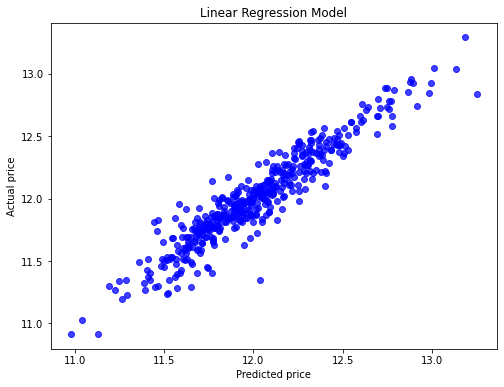

In [93]:
actual_values = y_test

plt.figure(figsize=(8,6))

plt.scatter(predictions_ln, actual_values, alpha= 0.75, color = 'b')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Linear Regression Model')
plt.show()

## Lasso Regression

In [94]:
from sklearn.linear_model import Lasso, LassoCV

optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=0)
optimal_lasso.fit(X_train_rf, y_train)

print(optimal_lasso.alpha_)

0.0006947245369562551


In [95]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_train_rf, y_train, cv=10)

lasso.fit(X_train_rf, y_train)

print(lasso_scores)
print(np.mean(lasso_scores))

[0.90225525 0.89101381 0.8679141  0.89821164 0.90115914 0.91595549
 0.88553047 0.9232835  0.90212929 0.87769433]
0.8965147018422327


In [96]:
#predicting on the test set

predictions_lasso = lasso.predict(X_test_rf)

R2_score_lasso = metrics.r2_score(y_test, predictions_lasso)
R2_score_lasso

0.8943738161759667

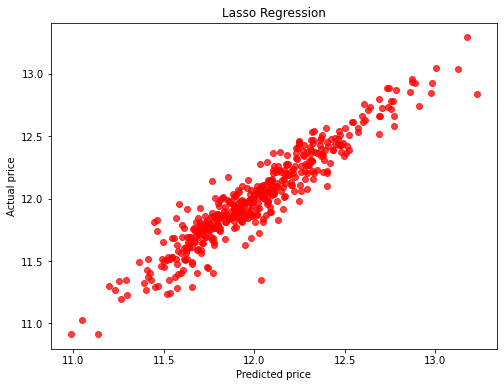

In [97]:
actual_values = y_test

plt.figure(figsize=(8,6))

plt.scatter(predictions_lasso, actual_values, alpha= 0.75, color = 'r')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Lasso Regression')
plt.show()

## Ridge Regression

In [98]:
from sklearn.linear_model import Ridge, RidgeCV

ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train_rf, y_train)

print(optimal_ridge.alpha_)

12.033778407775898


In [99]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_train_rf, y_train, cv=10)

ridge.fit(X_train_rf, y_train)

print(ridge_scores)
print(np.mean(ridge_scores))

[0.9021799  0.89119128 0.86797114 0.89804722 0.90121325 0.91609561
 0.88492074 0.92312845 0.90175513 0.87784939]
0.8964352108049918


In [100]:
#predicting on the test set

predictions_ridge = ridge.predict(X_test_rf)

R2_score_ridge = metrics.r2_score(y_test, predictions_ridge)
R2_score_ridge

0.8941651489289534

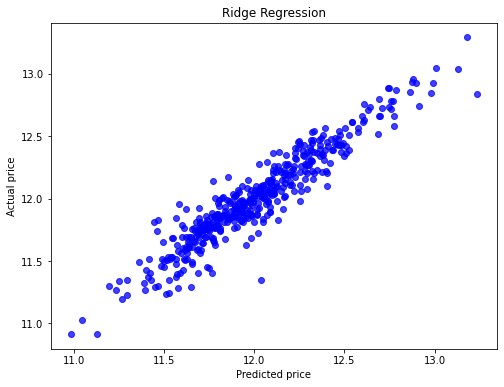

In [101]:
actual_values = y_test

plt.figure(figsize=(8,6))

plt.scatter(predictions_ridge, actual_values, alpha= 0.75, color = 'b')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Ridge Regression')
plt.show()

## ElasticNet Regression

In [102]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=0)
optimal_enet.fit(X_train_rf, y_train)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

0.000651536436658474
1.0


In [103]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X_train_rf, y_train, cv=10)

enet.fit(X_train_rf, y_train)

print(enet_scores)
print(np.mean(enet_scores))

[0.90228302 0.89100558 0.86791812 0.89816893 0.9011504  0.91596618
 0.88550808 0.92330808 0.9021226  0.87769801]
0.896512900004707


In [104]:
#predicting on the test set

predictions_enet = enet.predict(X_test_rf)

R2_score_enet = metrics.r2_score(y_test, predictions_enet)
R2_score_enet

0.8943641176246719

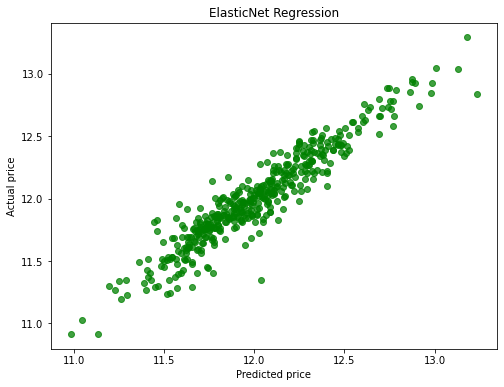

In [105]:
actual_values = y_test

plt.figure(figsize=(8,6))

plt.scatter(predictions_enet, actual_values, alpha= 0.75, color = 'g')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('ElasticNet Regression')
plt.show()

## Choosing the right model

In [106]:
R2 = pd.DataFrame({'Linear Regression': [R2_score_ln], 'Ridge Regression': [R2_score_ridge], 'Lasso Regression': [R2_score_lasso], 
                  'ElasticNet Regression': [R2_score_enet]})

In [107]:
R2.T.sort_values(0, ascending = False)

,0
Lasso Regression,0.894374
ElasticNet Regression,0.894364
Linear Regression,0.894176
Ridge Regression,0.894165


# Predicting for train dataset

In [108]:
predictions_lasso

array([12.26045389, 11.96451069, 12.1033627 , 11.99252042, 11.79353429,
       12.12396928, 12.43498754, 11.65457202, 12.27238638, 11.673702  ,
       11.56634552, 11.83320209, 12.11040608, 12.46970102, 11.26531012,
       12.63045213, 12.42281974, 11.80945382, 11.77705085, 13.23100499,
       11.82303854, 12.36722381, 11.64027987, 11.81192148, 11.96533329,
       11.60095974, 12.04211431, 12.64016334, 12.12759428, 12.21672338,
       12.28184722, 11.68905542, 11.80643526, 11.93501553, 11.80011134,
       12.78399186, 11.4683682 , 11.92589638, 11.46258331, 11.61669391,
       11.57620074, 11.04515075, 12.04840943, 12.11072527, 12.29145262,
       12.76928567, 11.54745555, 12.25739902, 11.59353711, 11.94856032,
       12.21545763, 11.65345508, 12.13315986, 12.10858798, 12.03496718,
       11.44674316, 12.32095038, 12.36377997, 11.57172074, 11.81187136,
       12.15769438, 11.76542562, 11.97884109, 11.94662538, 11.6096111 ,
       11.98160097, 11.77455947, 12.73640913, 13.00838261, 12.32

In [109]:
house.shape

(2188, 260)

In [110]:
test.shape

(733, 260)

In [117]:
## create dataframe with "Order" and prediction
pred_df = pd.DataFrame({'Order':house['Order'], 'SalePrice':y_train})
pred_df.head()

,Order,SalePrice
0,534,11.976659
1,803,NaN
2,956,11.831379
3,460,12.423198
4,487,12.025749
